**Problem statement:**\
a retail outlet company decises to study thier customer data based on thier expenditure behaviour. We have to do customer segmentation based on thier the parameters given to us.

## Clustering

Grouping of data points based on the similarities and dissimilarities between them, within the group and among different groups.

Primarily clustering is classified as Partitional clustering (K-Means Clustering) and Hierarchical clustering. 

**K-means clustering**: An unsupervised learning algorithm. It finds groups or assign 
the data points to clusters on the basis of their similarity. Which means the points in same cluster are 
similar to each other and in different clusters are dissimilar with each other.
#### K = number of clusters.

**Centroid-** It can be termed as a real or imaginary location which represents the centre of the cluster.\
**Parameter K-** K is a target variable which refers to the number of centroids in the respective or given
dataset. It is used to label the new data.\
**Means-** In K-means clustering, ‘means’ refer to the averaging of data used to find the centroid in a the 
cluster.

#### K-means clustering is depends on the distance metrics.

Euclidean Distance- Square_Root(x1 − y1)^2 + (x2 − y2)^2

Manhattan Distance- |x1 − y1| + |x2 − y2|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
data_df = pd.read_csv("Cust_Spend_Data_New.csv")

In [3]:
data_df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17
...,...,...,...,...,...,...,...
824,825,Mccue,4639,17,4,7,10
825,826,Dumas,4522,19,3,8,8
826,827,Bock,4499,15,4,8,9
827,828,Mcreynolds,4069,20,4,7,10


In [4]:
data_df.shape

(829, 7)

In [5]:
data_df.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          829 non-null    int64 
 1   Name             829 non-null    object
 2   Avg_Mthly_Spend  829 non-null    int64 
 3   No_Of_Visits     829 non-null    int64 
 4   Apparel_Items    829 non-null    int64 
 5   FnV_Items        829 non-null    int64 
 6   Staples_Items    829 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 45.5+ KB


In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,829.0,415.000000,239.455981,1.0,208.0,415.0,622.0,829.0
Avg_Mthly_Spend,829.0,4801.276236,2056.494189,549.0,4156.0,4516.0,4910.0,10000.0
No_Of_Visits,829.0,17.856454,4.367192,2.0,15.0,18.0,20.0,29.0
Apparel_Items,829.0,3.961399,2.056204,0.0,3.0,4.0,5.0,10.0
FnV_Items,829.0,7.623643,3.665773,1.0,6.0,7.0,8.0,19.0
Staples_Items,829.0,8.338963,4.250284,0.0,5.0,8.0,10.0,20.0


In [8]:
data_df.duplicated().sum()

0

In [9]:
cust_df = data_df.drop(['Name','Cust_ID'], axis=1)

In [10]:
cust_df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [11]:
cust_df.shape

(829, 5)

In [12]:
# from sklearn.preprocessing import StandardScaler

In [13]:
X = StandardScaler()

**Scaling data is a must in this dataset before doing Cluster Analysis.**\
**Scaling the dataset will allow all variables to be considered by the algorithm with equal importance.**

In [14]:
scaled_df = X.fit_transform(cust_df)

In [15]:
scaled_df

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

## Model Building

In [16]:
k_means = KMeans()

In [17]:
k_means.fit(scaled_df)

KMeans()

In [18]:
k_means.labels_

array([1, 2, 4, 7, 1, 7, 7, 2, 7, 7, 4, 7, 2, 7, 6, 6, 1, 3, 7, 6, 7, 2,
       2, 1, 6, 2, 7, 1, 1, 1, 1, 7, 3, 5, 1, 6, 4, 5, 4, 1, 2, 6, 1, 1,
       4, 6, 4, 1, 2, 6, 7, 2, 7, 1, 2, 4, 1, 6, 2, 4, 6, 1, 6, 1, 2, 7,
       7, 6, 1, 6, 1, 2, 7, 2, 6, 2, 4, 3, 2, 3, 2, 2, 7, 2, 1, 2, 2, 2,
       5, 7, 1, 3, 2, 5, 1, 4, 1, 2, 7, 4, 3, 1, 1, 2, 7, 6, 2, 4, 2, 1,
       2, 2, 2, 7, 4, 0, 4, 2, 3, 5, 2, 5, 1, 1, 2, 6, 4, 2, 6, 2, 7, 2,
       1, 6, 7, 7, 0, 2, 7, 7, 6, 1, 1, 2, 4, 6, 5, 4, 4, 4, 6, 2, 4, 4,
       3, 1, 2, 1, 1, 7, 7, 1, 5, 2, 3, 4, 7, 1, 6, 7, 7, 4, 7, 2, 7, 4,
       2, 4, 2, 6, 2, 7, 4, 7, 7, 6, 6, 2, 2, 1, 6, 7, 7, 7, 7, 4, 7, 7,
       7, 2, 6, 2, 7, 1, 7, 2, 4, 7, 1, 1, 7, 1, 1, 1, 7, 2, 1, 7, 6, 2,
       2, 2, 3, 7, 1, 1, 4, 2, 7, 4, 1, 2, 4, 7, 2, 4, 2, 7, 1, 1, 6, 6,
       7, 1, 4, 6, 4, 1, 2, 6, 4, 7, 7, 4, 2, 5, 4, 1, 7, 1, 2, 6, 1, 2,
       7, 6, 7, 2, 4, 6, 2, 4, 2, 2, 7, 2, 5, 2, 6, 6, 4, 7, 2, 2, 4, 6,
       6, 4, 4, 1, 2, 2, 4, 2, 1, 2, 2, 7, 7, 4, 7,

In [19]:
wss =[] 

In [20]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
    
# Inertia: Sum of squared distances of samples to their closest cluster center.

In [21]:
wss

# WSS means the sum of distances between the points and the corresponding centroids for each cluster.

[4145.0,
 2225.818078099467,
 1074.3823802989516,
 909.4495242917951,
 813.1902471448083,
 697.8265440467197,
 630.8459372674877,
 580.9783026797729,
 540.0611404300253,
 511.8291179889103]

**K-means inertia provides us threshold value of WSS**.\
After this value there is no change in a new cluster.\
It means, if we continue making new clusters even after the value KMeans Inertia, we do not add any value in new clusters.

**Here, after cluster 3 there is NOT much change in the value. therefore separating this dataset into 3 clusters.**

### Another method to find optimum number of clusters (Elbow Method).

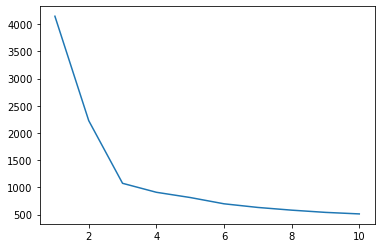

In [22]:
plt.plot(range(1,11), wss)

#### Elbow Method- most popular and well-known method to find the optimal no. of clusters or the value of k in the process of clustering.

## Model Tuning 

In [23]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [24]:
labels

array([1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2,
       2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0,
       0, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2,
       0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2,
       1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2,
       2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0,

In [25]:
data_df["Cluster_kmeans"] = labels
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster_kmeans
0,1,Abraham,1123,28,1,16,14,1
1,2,Adela,9818,13,5,2,5,2
2,3,Adelina,9824,10,10,2,2,2
3,4,Adrian,3097,23,2,8,9,0
4,5,Adrianna,817,28,1,17,17,1


Printed original dataset having Cluster_kmeans column. Basically each row/ entry is defined as which KMeans cluster value it belongs to.

In [26]:
# from sklearn.metrics import silhouette_samples, silhouette_score

### Model performance

In [27]:
silhouette_score(scaled_df,labels)

0.5863370901372584

**Silhouette Score**

Silhouette_Score = b-a/ max(a,b)\
b = distance between observation and the neighbour cluster centroid.\
a = distance between observation and its own cluster centroid

If the silhouette score is close to +1 then we can say the clusters are well separated from each other 
on an average.\
If the silhouette score is close to 0, then we can say the clusters are not separated from each other.\
If the silhouette score is close to -1 then we can say the model has done a blunder in terms of 
clustering the dat

In [28]:
sil_width = silhouette_samples(scaled_df,labels)

In [29]:
data_df["sil_width"] = sil_width
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster_kmeans,sil_width
0,1,Abraham,1123,28,1,16,14,1,0.656055
1,2,Adela,9818,13,5,2,5,2,0.512424
2,3,Adelina,9824,10,10,2,2,2,0.582380
3,4,Adrian,3097,23,2,8,9,0,0.375197
4,5,Adrianna,817,28,1,17,17,1,0.703167


In [30]:
pd.DataFrame(data_df['sil_width']).sort_values(ascending = True, by='sil_width').head(10)

,sil_width
119,0.041310
75,0.050929
228,0.062204
146,0.075557
50,0.076327
52,0.076711
33,0.082028
319,0.089249
194,0.092112
159,0.098386


In [31]:
pd.DataFrame(data_df).sort_values(ascending = True, by='sil_width')

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster_kmeans,sil_width
119,120,Gisele,7000,7,1,3,4,2,0.041310
75,76,Deedee,7030,15,4,2,8,0,0.050929
228,229,Michale,4344,23,4,12,14,0,0.062204
146,147,Jacinta,6500,5,1,1,4,2,0.075557
50,51,Chanel,3345,21,1,11,13,1,0.076327
...,...,...,...,...,...,...,...,...,...
602,603,Daisy,4239,18,4,7,9,0,0.724864
440,441,Nelson,4278,19,4,8,8,0,0.725324
350,351,Larry,4147,19,4,8,8,0,0.725403
339,340,Tina,4186,19,4,8,8,0,0.725511


In [32]:
(data_df['sil_width']>=0.25).value_counts()

True     790
False     39
Name: sil_width, dtype: int64

In [33]:
gg1 = data_df.loc[data_df['sil_width']>=0.25].sort_values(by='sil_width')
gg1

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster_kmeans,sil_width
91,92,Ellsworth,3315,6,5,9,12,0,0.256719
139,140,Hortensia,4279,19,2,10,14,0,0.256914
104,105,Flo,3731,25,1,8,8,0,0.259784
164,165,Joel,4720,9,6,11,11,0,0.260240
82,83,Doreen,3292,21,2,11,10,0,0.260664
...,...,...,...,...,...,...,...,...,...
602,603,Daisy,4239,18,4,7,9,0,0.724864
440,441,Nelson,4278,19,4,8,8,0,0.725324
350,351,Larry,4147,19,4,8,8,0,0.725403
339,340,Tina,4186,19,4,8,8,0,0.725511


In [34]:
gg1.loc[:, ['Avg_Mthly_Spend', 'Cluster_kmeans', 'sil_width']].head(10)

,Avg_Mthly_Spend,Cluster_kmeans,sil_width
91,3315,0,0.256719
139,4279,0,0.256914
104,3731,0,0.259784
164,4720,0,0.260240
82,3292,0,0.260664
251,4465,0,0.285643
26,4647,0,0.299677
66,3135,0,0.302293
272,7251,2,0.307891
223,5158,0,0.318706


In [35]:
data_df.iloc[:, [-1,-2]]

,sil_width,Cluster_kmeans
0,0.656055,1
1,0.512424,2
2,0.582380,2
3,0.375197,0
4,0.703167,1
...,...,...
824,0.690901,0
825,0.716207,0
826,0.654906,0
827,0.679728,0


In [36]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,829.0,415.000000,239.455981,1.00000,208.000000,415.000000,622.000000,829.00000
Avg_Mthly_Spend,829.0,4801.276236,2056.494189,549.00000,4156.000000,4516.000000,4910.000000,10000.00000
No_Of_Visits,829.0,17.856454,4.367192,2.00000,15.000000,18.000000,20.000000,29.00000
Apparel_Items,829.0,3.961399,2.056204,0.00000,3.000000,4.000000,5.000000,10.00000
FnV_Items,829.0,7.623643,3.665773,1.00000,6.000000,7.000000,8.000000,19.00000
Staples_Items,829.0,8.338963,4.250284,0.00000,5.000000,8.000000,10.000000,20.00000
Cluster_kmeans,829.0,0.463209,0.764654,0.00000,0.000000,0.000000,1.000000,2.00000
sil_width,829.0,0.586337,0.130648,0.04131,0.557318,0.629012,0.668817,0.72848


In [37]:
KMeansCP = data_df.iloc[:,0:10].groupby('Cluster_kmeans').mean()
KMeansCP['Freq']=data_df.Cluster_kmeans.value_counts().sort_index()
KMeansCP.round(2)

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,sil_width,Freq
Cluster_kmeans,,,,,,,,
0,518.30,4486.68,17.78,3.79,7.35,8.03,0.60,584
1,152.31,1546.83,25.38,1.02,15.09,16.72,0.60,106
2,181.32,8604.83,12.45,6.94,3.07,3.24,0.52,139


cluster 0: monthly spending is the least. number of visits are the maximum. Seems they visit the mall to buy FnV and Staple products.

cluster 1: Average in monthly speaning and visits. largest in head count.

clsuter 2: High spending, least number of visits. heighest in Apparel purchase.

In [38]:
584+106+139

829

In [39]:
4486/17.78
# 1546/25.38

252.30596175478064

In [40]:
8604/12.45

691.0843373493976

## Created a new dataset 'gg1_new_data' which has data/ row having 'silhouette_score' >= 0.25

In [41]:
gg1

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster_kmeans,sil_width
91,92,Ellsworth,3315,6,5,9,12,0,0.256719
139,140,Hortensia,4279,19,2,10,14,0,0.256914
104,105,Flo,3731,25,1,8,8,0,0.259784
164,165,Joel,4720,9,6,11,11,0,0.260240
82,83,Doreen,3292,21,2,11,10,0,0.260664
...,...,...,...,...,...,...,...,...,...
602,603,Daisy,4239,18,4,7,9,0,0.724864
440,441,Nelson,4278,19,4,8,8,0,0.725324
350,351,Larry,4147,19,4,8,8,0,0.725403
339,340,Tina,4186,19,4,8,8,0,0.725511


In [42]:
gg1.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,790.0,427.027848,238.096426,1.000000,224.250000,434.500000,631.750000,829.00000
Avg_Mthly_Spend,790.0,4817.775949,2063.673515,549.000000,4168.000000,4522.500000,4902.750000,9995.00000
No_Of_Visits,790.0,17.937975,4.078750,6.000000,15.000000,18.000000,20.000000,29.00000
Apparel_Items,790.0,4.054430,2.021011,0.000000,3.000000,4.000000,5.000000,10.00000
FnV_Items,790.0,7.588608,3.645456,1.000000,6.000000,7.000000,8.000000,19.00000
Staples_Items,790.0,8.277215,4.248058,1.000000,5.000000,8.000000,10.000000,20.00000
Cluster_kmeans,790.0,0.468354,0.767453,0.000000,0.000000,0.000000,1.000000,2.00000
sil_width,790.0,0.607253,0.091663,0.256719,0.571761,0.632038,0.670338,0.72848


In [43]:
gg1_new_data = gg1.iloc[:, 2:7]
gg1_new_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
91,3315,6,5,9,12
139,4279,19,2,10,14
104,3731,25,1,8,8
164,4720,9,6,11,11
82,3292,21,2,11,10
...,...,...,...,...,...
602,4239,18,4,7,9
440,4278,19,4,8,8
350,4147,19,4,8,8
339,4186,19,4,8,8


## Model Building on new dataset, gg1_new_data

In [44]:
k_means_gg1 = KMeans(n_clusters = 3).fit(gg1_new_data)
labels_gg1 = k_means_gg1.labels_

In [45]:
labels_gg1 # (prediction on clusters)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0,
       1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1,
       1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0,

In [46]:
labels_gg1.shape

(790,)

In [47]:
gg1_new_data["Cluster_kmeans_gg"] = labels_gg1
gg1_new_data.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster_kmeans_gg
91,3315,6,5,9,12,0
139,4279,19,2,10,14,0
104,3731,25,1,8,8,0
164,4720,9,6,11,11,0
82,3292,21,2,11,10,0
251,4465,22,3,10,13,0
26,4647,23,4,9,14,0
66,3135,17,4,12,13,0
272,7251,11,4,4,1,1
223,5158,25,4,8,13,0


In [48]:
KMeansCP_gg1 = gg1_new_data.iloc[:,0:10].groupby('Cluster_kmeans_gg').mean()
KMeansCP_gg1['Frequency']=gg1_new_data.Cluster_kmeans_gg.value_counts().sort_index()
KMeansCP_gg1.round(2)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Frequency
Cluster_kmeans_gg,,,,,,
0,4509.74,17.84,3.88,7.26,7.92,554
1,8630.15,12.60,7.11,3.10,3.22,134
2,1482.41,25.48,1.01,15.25,16.87,102


In [49]:
# from sklearn.metrics import silhouette_samples, silhouette_score

### Model performance

In [50]:
silhouette_score(gg1_new_data,labels_gg1)

0.819633797976614

In [51]:
sil_width_gg1 = silhouette_samples(gg1_new_data,labels_gg1)
sil_width_gg1

array([0.34488622, 0.87539393, 0.64519814, 0.89447141, 0.32409884,
       0.89912351, 0.89963399, 0.16632532, 0.48534994, 0.80425029,
       0.76218643, 0.53754235, 0.44421514, 0.83121963, 0.78808647,
       0.62791543, 0.41123277, 0.69204565, 0.44901266, 0.52073759,
       0.43373007, 0.65505172, 0.44040211, 0.64377436, 0.89571576,
       0.82393019, 0.12334003, 0.22187767, 0.37327244, 0.89844817,
       0.37803508, 0.57162837, 0.84838253, 0.80884646, 0.80470057,
       0.60296267, 0.57913935, 0.44420498, 0.58834927, 0.8394004 ,
       0.3777187 , 0.80534311, 0.89805527, 0.65489486, 0.70937919,
       0.68076379, 0.8284642 , 0.82251019, 0.8283154 , 0.79725378,
       0.579749  , 0.87434244, 0.80864707, 0.83721394, 0.88897921,
       0.76407614, 0.87748758, 0.87945796, 0.79789507, 0.50945397,
       0.89550118, 0.89592537, 0.54969779, 0.56233894, 0.37959366,
       0.46042422, 0.76148859, 0.4376522 , 0.82613504, 0.90130136,
       0.8982629 , 0.78973324, 0.81513768, 0.49521178, 0.81440

In [52]:
gg1_new_data["sil_width_gg1"] = sil_width_gg1
gg1_new_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster_kmeans_gg,sil_width_gg1
91,3315,6,5,9,12,0,0.344886
139,4279,19,2,10,14,0,0.875394
104,3731,25,1,8,8,0,0.645198
164,4720,9,6,11,11,0,0.894471
82,3292,21,2,11,10,0,0.324099
...,...,...,...,...,...,...,...
602,4239,18,4,7,9,0,0.866965
440,4278,19,4,8,8,0,0.875285
350,4147,19,4,8,8,0,0.841568
339,4186,19,4,8,8,0,0.853416


In [53]:
data_df.to_csv('km20Feb2022.csv')

#### Advantages of K-means clustering:
- Ease of implementation.
- It works great on large scale data.
- Results guarantees convergence.
- Easily works with new examples.

#### Disadvantages of K-means clustering:
- It is quite difficult to predict number of clusters.
- Initialization of the cluster center is a really crucial part and also somewhat tough.
- K- means clustering only handles numeric data

### Happy Learning